In [1]:
#library for mathematical computations
import numpy as np #linear algebra
import pandas as pd #data processing

In [2]:
# library for visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [48]:
# library for modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [30]:
# evalue model
from sklearn.metrics import r2_score

## Preparing Training Data
#### Cleaning Data
* the quantity of data missing from columns will be checked, then > 80% missing data -> remove, fill 
* checking outlier ( An Outlier is a datapoint that is bigger or smaller than the next nearest datapoint) ( having Outlier tao ra su khac biet lon va ket qua bi sai lech

In [4]:

df = pd.read_csv('day.csv')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### 1.Check missing data 

In [8]:
percent_missing_data = 100*df.isna().sum()/len(df)
percent_missing_data.sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### 2. Removing redundant & unwanted columns
* instant
* dteday
* casual & registered

In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
df_new = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [11]:
df_new.shape

(731, 12)

In [13]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


(731, 16)

#### 3. SPLITTING THE DATA
* Splitting the data to Train and Test: TRAIN and TEST (80:20)
* We will use train_test_split method from sklearn package for this

In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.8, test_size = 0.2)

In [17]:
df_train.shape, df_test.shape

((584, 12), (147, 12))

## EXPLORATORY DATA ANALYSIS

### 1. Visualising Numeric Variables

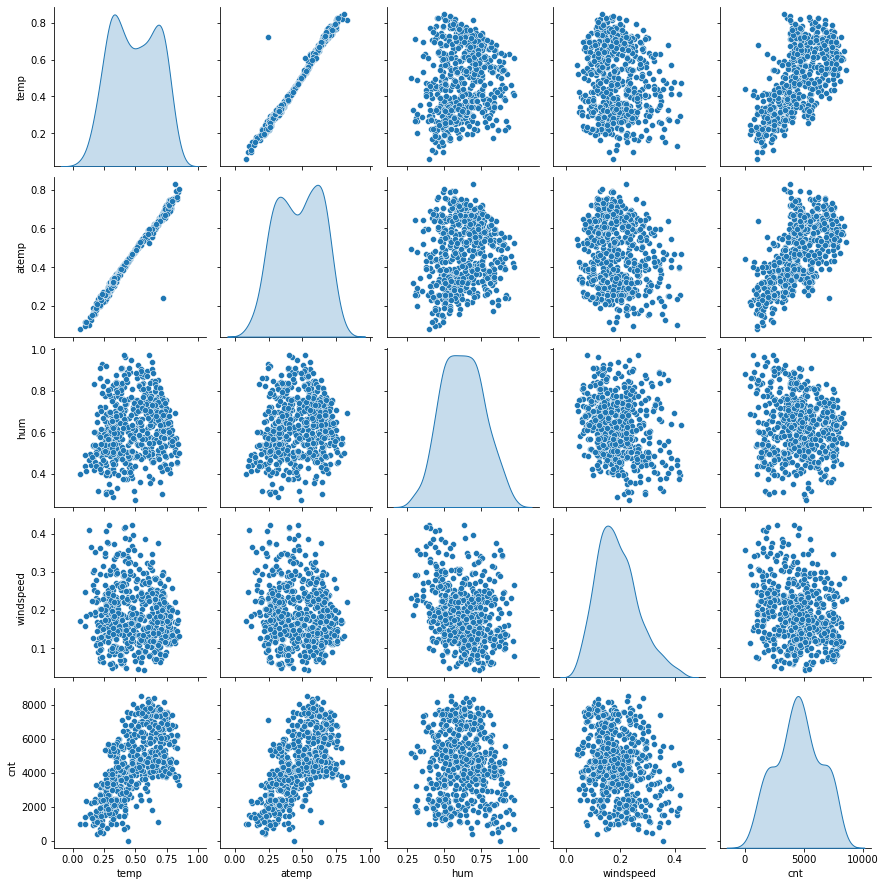

In [20]:
columns=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(columns, diag_kind='kde')
plt.show()

### 2. Visualising Catagorical Variables

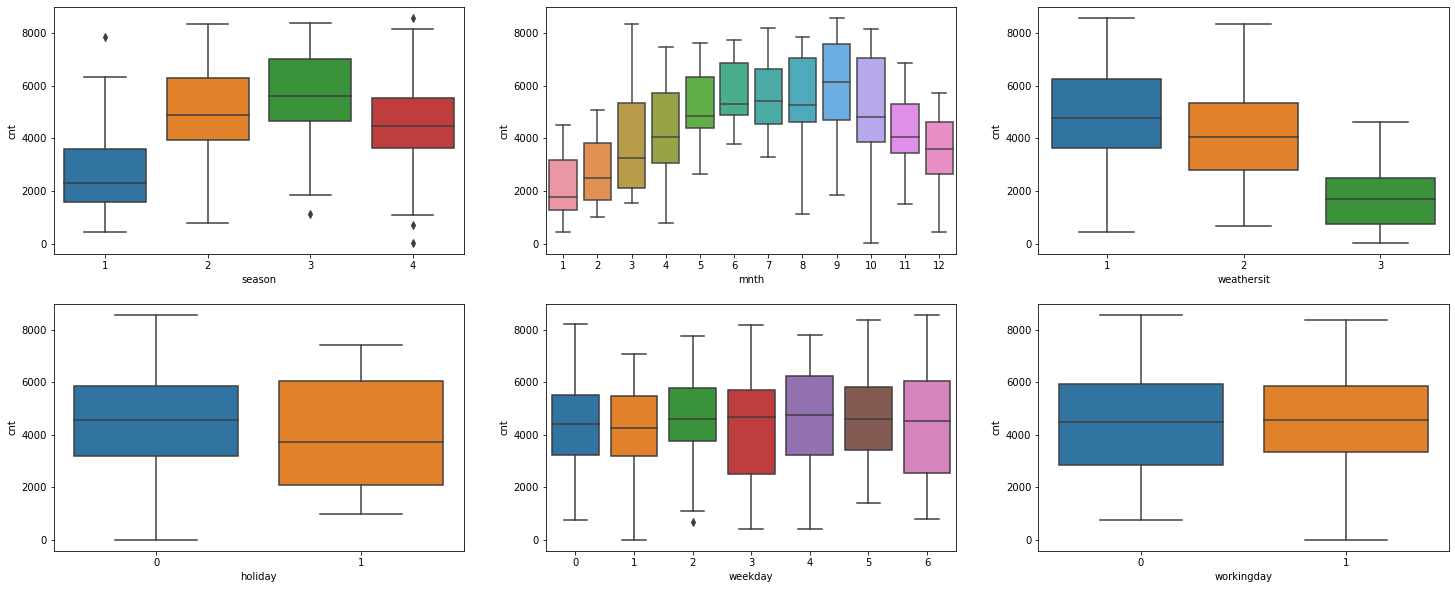

In [26]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_train)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_train)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_train)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_train)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_train)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_train)
plt.show()

## Modeling with Linear Regression

In [34]:
X_train = df_train.iloc[:, : -1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:,-1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(584, 11) (147, 11) (584,) (147,)


### 1. Linear Regression

In [38]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predicted_lr = linearRegressor.predict(X_test)
r_lr = r2_score(y_test, y_predicted_lr)
r_lr

0.8045560823654133

### 2. Rigde Regression

In [41]:
ridge_Regression = Ridge(alpha = 0.5)
ridge_Regression.fit(X_train, y_train)
y_predicted_rg = ridge_Regression.predict(X_test)
r_rg = r2_score(y_test, y_predicted_rg)
r_rg

0.8066171613338551

### 3. Lasso Regression

In [45]:
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
y_predicted_ls = lasso_model.predict(X_test)
r_ls = r2_score(y_test, y_predicted_ls)
r_ls

0.8049232582427147

### 4. Random Forest Regressor

In [47]:
model = RandomForestRegressor(n_estimators = 50)
model.fit(X_train, y_train)
y_predict_rfg = model.predict(X_test)
r_rfg = r2_score(y_test, y_predict_rfg)
r_rfg

0.8976708519562636

### 5. Polynomial

In [52]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)
model_p_2 = LinearRegression()
model_p_2.fit(x_poly, y_train)
y_predicted_p_2 = model_p_2.predict(x_poly_test)
r_p_2 = r2_score(y_test, y_predicted_p_2)
r_p_2

0.8508086372630033

In [54]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)
model_p_3 = LinearRegression()
model_p_3.fit(x_poly, y_train)
y_predicted_p_3 = model_p_3.predict(x_poly_test)
r_p_3 = r2_score(y_test, y_predicted_p_3)
r_p_3

0.5170088745358005

In [56]:
output_y = pd.DataFrame({'y True': y_test, 'y_Linear Regression': y_predicted_lr, 'y_Ridge Regresiion': y_predicted_rg, 
                         'y_ Lasso Regression': y_predicted_ls, 'y_Random Forest Regressor': y_predict_rfg,
                         'y_Polynomial degree 2': y_predicted_p_2, 'y_Polynomial degree 3': y_predicted_p_3} )

In [57]:
output_y

,y True,y_Linear Regression,y_Ridge Regresiion,y_ Lasso Regression,y_Random Forest Regressor,y_Polynomial degree 2,y_Polynomial degree 3
196,5923,5130.102163,5127.989670,5129.498743,5191.92,4995.969637,6097.494029
187,4592,5425.674663,5417.346271,5424.095426,4662.64,4450.047440,4566.944207
14,1248,1741.376348,1685.925201,1724.359357,1640.30,1841.294786,-1373.220190
31,1360,1207.859248,1177.358431,1201.556485,1041.08,45.896898,2331.443245
390,4075,4144.124673,4102.634971,4134.754290,3371.06,3920.561104,4533.262584
...,...,...,...,...,...,...,...
566,5870,6109.978577,6134.840876,6119.059945,5287.74,5414.476811,4148.800768
688,5499,4899.945864,4915.960791,4901.063323,5473.72,5072.712669,5306.845508
266,5423,4586.618732,4562.874952,4582.698201,4127.82,4435.966852,4830.701343
504,8294,6782.814619,6702.210501,6761.043228,7570.22,7558.676860,7605.634368


In [59]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regressor', 'Polynomial Degree 2', 'Polynomial Degree 3']
r = [r_lr, r_rg, r_ls, r_rfg, r_p_2, r_p_2]

In [62]:
out_score = pd.DataFrame({'Model': models, 'R2 Score': r})
out_score

,Model,R2 Score
0,Linear Regression,0.804556
1,Ridge Regression,0.806617
2,Lasso Regression,0.804923
3,Random Forest Regressor,0.897671
4,Polynomial Degree 2,0.850809
5,Polynomial Degree 3,0.850809
